In [1]:
import cytoreactors.modeling.EL222_model_2V_3P_A as model
from cytoreactors.control.MPC import DutyCycleController, SimpleDutyCycleController
from cytoreactors.modeling.simulation import simulate, simulate_analytic, light_profile_to_traj
import matplotlib.pyplot as plt
from time import time

In [2]:
control = DutyCycleController(target=3000, model=model, model_pars=model.default_model_pars,
                             initial_state=[0,0], dc_period_hrs=0.5)
all_lps = []
t0 = time()
for i in range(10):
    dcs = control.optimize()
    print(time()-t0)
    t0= time()
    lp = control.dcs_to_light_profile(dcs[:2])
    all_lps += lp
    t,y,_ = simulate_analytic(control.model, control.model_pars, lp, control.current_state, n_evals=21)
    control.current_state = y.transpose()[-1]

0.051056861877441406
0.10934209823608398
0.093780517578125
0.14483356475830078
0.14871525764465332
0.12500643730163574
0.09371399879455566
0.10203957557678223
0.14064598083496094
0.07813167572021484


In [3]:
t,y,_ = simulate(control.model, control.model_pars, all_lps, [0,0], n_evals=21)
tl,l = light_profile_to_traj(all_lps)

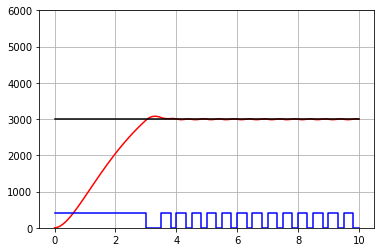

In [4]:
plt.plot(t,y[-1],'r')
plt.plot([0,10],[control.target,control.target],'k')
plt.plot(tl,l*10,'b')
plt.ylim([0,control.target*2])
plt.grid()